In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.width", 500)

In [4]:
test =  pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv")
train = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s3e24/sample_submission.csv")

In [5]:
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [6]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.00,0.50,0.60,1,1,135,87,94,172,300,40,75,16.50,1,1.00,22,25,27,0,1
1,70,165,65,89.00,0.60,0.70,2,2,146,83,147,194,55,57,126,16.20,1,1.10,27,23,37,1,0
2,20,170,75,81.00,0.40,0.50,1,1,118,75,79,178,197,45,93,17.40,1,0.80,27,31,53,0,1
3,35,180,95,105.00,1.50,1.20,1,1,131,88,91,180,203,38,102,15.90,1,1.00,20,27,30,1,0
4,30,165,60,80.50,1.50,1.00,1,1,121,76,91,155,87,44,93,15.40,1,0.80,19,13,17,0,1


In [7]:
test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.00,1.20,1.20,1,1,130,89,107,200,186,49,115,14.20,1,0.90,19,25,32,0
1,80,160,60,93.00,1.00,1.00,2,2,144,72,93,172,158,35,104,13.00,1,1.10,20,12,24,0
2,60,170,70,86.50,0.60,0.70,1,1,117,75,92,161,173,39,88,15.40,1,1.40,38,60,36,0
3,40,160,50,67.00,0.30,0.40,1,1,116,62,91,213,47,75,128,14.50,1,0.60,25,18,10,1
4,40,170,75,89.40,1.00,0.90,1,1,132,94,79,170,100,39,123,16.50,1,1.00,30,39,27,1


In [8]:
def data_summary(dataframe):
    print("############## SHAPE ##############")
    print(dataframe.shape)
    print("############## TYPES ##############")
    print(dataframe.dtypes)
    print("############## NULL ##############")
    print(dataframe.isnull().sum())
    print("############ DESCRIBE ############")
    print(dataframe.describe([0.0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

In [9]:
data_summary(train)

############## SHAPE ##############
(159256, 23)
############## TYPES ##############
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object
############## NULL ##############
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hea

In [10]:
data_summary(test)

############## SHAPE ##############
(106171, 22)
############## TYPES ##############
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
dtype: object
############## NULL ##############
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(r

In [11]:
train["smoking"].value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

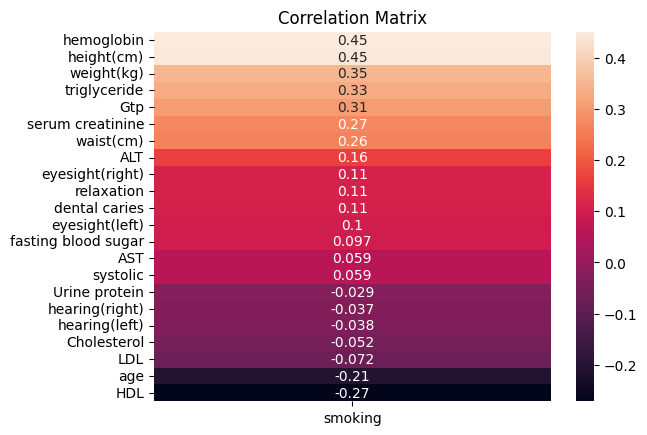

In [12]:
corr = train.corr()[["smoking"]]
corr.drop(['smoking'], axis=0, inplace=True)
sns.heatmap(corr.sort_values(by = "smoking", ascending = False), annot = True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
columns = train.columns.to_list()
columns.remove("smoking")

In [14]:
train.groupby("smoking")[columns].mean()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
smoking,,,,,,,,,,,,,,,,,,,,,,
0,46.46,161.79,63.24,80.93,0.97,0.96,1.03,1.03,121.85,76.01,97.05,197.10,108.24,59.19,116.40,14.23,1.08,0.85,25.02,24.00,27.81,0.16
1,41.54,169.74,72.16,85.67,1.05,1.05,1.02,1.02,123.35,77.99,100.03,194.12,152.54,51.56,112.30,15.53,1.06,0.95,26.15,29.83,47.03,0.25


# **Modelling**

*Data Split*

In [15]:
y = train["smoking"]
x = train.drop("smoking", axis = 1)

In [16]:
print(x.shape)
print(y.shape)

(159256, 22)
(159256,)


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20, random_state= 42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [19]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machines' : LinearSVC(),
    'Decision Trees' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Naive Bayes' : GaussianNB(),
    'K-Nearest Neighbor' : KNeighborsClassifier()
}

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(x_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(x_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.74,0.70,0.70
Support Vector Machines,0.68,0.97,0.58
Decision Trees,0.70,0.65,0.66
Random Forest,0.77,0.80,0.72
Naive Bayes,0.72,0.78,0.66
K-Nearest Neighbor,0.72,0.70,0.67
